In [18]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import Lasso, LassoCV
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, mean_squared_error

In [6]:
#choosing top 10 for correlated and top 10 for not correlated
df = pd.read_csv('./df_poly.csv').set_index('county')
y_df = pd.read_csv('./ca_dropout_and_predictors_v5.csv').set_index('county')['dropout_log']

In [7]:
X = df[['ecigs_sold_pct_tobacco_stores_2016 gini_coef', 'ecigs_sold_pct_tobacco_stores_2016', 'ecigs_sold_pct_tobacco_stores_2016 povr_whole_total_estimate', 'ecigs_sold_pct_tobacco_stores_2016 std_chlamydia_rate', 'daycare_slots_child_rate_slots ecigs_sold_pct_tobacco_stores_2016', 'daycare_slots_infant_pct_nonwhite ecigs_sold_pct_tobacco_stores_2016','daycare_slots_child_pct_nonwhite ecigs_sold_pct_tobacco_stores_2016','std_chlamydia_rate','std_chlamydia_rate sui_adjusted_rate_avg', 'std_chlamydia_rate gini_coef']]
y = y_df

# Run a standard scaler and then a random forest

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state=31)

In [10]:
sc = StandardScaler()

In [11]:
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [12]:
rf = RandomForestRegressor(n_estimators=100, max_depth = 3)

In [13]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [14]:
rf.score(X_train, y_train)

0.8554770603733869

In [15]:
rf.score(X_test, y_test)

0.24773222411377427

In [19]:
y_pred = rf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.14176529157161033

R2 score for train looks okay but the model seems very overfit as the train and test R2 are very far apart.

# Run a lasso to help with feature engineering

In [21]:
#going to cross validate over a bunch of alphas
l_alphas = np.linspace(1, 100, 1000)

In [22]:
lasso_cv = LassoCV(alphas = l_alphas)

In [23]:
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([  1.        ,   1.0990991 ,   1.1981982 ,   1.2972973 ,
         1.3963964 ,   1.4954955 ,   1.59459459,   1.69369369,
         1.79279279,   1.89189189,   1.99099099,   2.09009009,
         2.18918919,   2.28828829,   2.38738739,   2.48648649,
         2.58558559,   2.68468468,   2.78378378,   2.88288288,
         2.98198198,   3.08108108,   3.18018018,   3.27927928,
         3.37837838,   3.47747748,   3.57657658,   3.67567568,
         3.77477477,   3.87387387,   3.97297297,...
        96.92792793,  97.02702703,  97.12612613,  97.22522523,
        97.32432432,  97.42342342,  97.52252252,  97.62162162,
        97.72072072,  97.81981982,  97.91891892,  98.01801802,
        98.11711712,  98.21621622,  98.31531532,  98.41441441,
        98.51351351,  98.61261261,  98.71171171,  98.81081081,
        98.90990991,  99.00900901,  99.10810811,  99.20720721,
        99.30630631,  99.40540541,  99.5045045 ,  99.6036036 ,
        99.7027027 ,  99.8018018 ,  99.9009009 , 100.        ]))

In [24]:
lasso_cv.alpha_

100.0

In [25]:
lasso_cv.score(Z_train, y_train)

0.0

In [26]:
lasso = Lasso(alpha = 100)
lasso.fit(Z_train, y_train)

Lasso(alpha=100)

In [27]:
lasso.score(Z_train, y_train)

0.0

In [29]:
y_pred = lasso.predict(Z_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.26936868837872685

# Try clustering

In [130]:
# Fit a K-means clustering model
km = KMeans(n_clusters=3, random_state=31)

km.fit(X_scaled)

/Users/eliwinton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=31)

In [131]:
km.inertia_

316.88688813569706

In [133]:
silhouette_score(X_scaled, km.labels_)

0.22595014637439376

In [144]:
inertia_list = []

for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=31) 
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

[570.0,
 389.37013634188804,
 341.33738944473146,
 272.16270864080695,
 230.94433142391608,
 227.7296166693218,
 185.80030554294655,
 153.57108334312446,
 146.73903572216017,
 134.93081666756075,
 114.46308366720585,
 100.37094428229241,
 93.14612339773296,
 86.99026434144076,
 84.04992483304933,
 74.74001466571315,
 68.93411570618557,
 64.33124132486113,
 59.24252859493364,
 55.35081463749498,
 49.488978954808275,
 47.59047838117718,
 43.348306293893174,
 41.997187470792795,
 40.55949828479813,
 38.42219874251097,
 35.468766281301974,
 31.071742920144594,
 29.498579509607758,
 27.45211948581138,
 25.524291952416633,
 23.264890407568835,
 20.83713785961912,
 18.993463266119235,
 17.107473428905536,
 16.145119984125408,
 15.27725680461881,
 12.659604579596296,
 11.874479188315853]

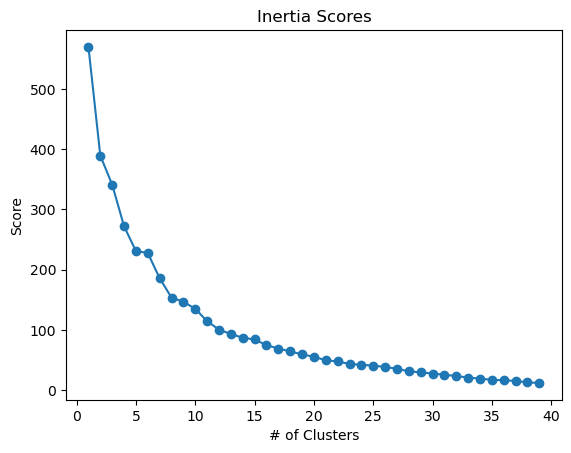

In [145]:
plt.plot(range(1, 40), inertia_list, marker = 'o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [148]:
silhouette_list = []

for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=31)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

silhouette_list

[0.28474706123145677,
 0.16945359233745655,
 0.19589387623464619,
 0.24999668231013175,
 0.18583875032823488,
 0.21669688550054148,
 0.21261488138363502,
 0.17643011858871008,
 0.18571958284291615,
 0.21614587843252125,
 0.23469722794380582,
 0.24017480836600466,
 0.22209572390187626,
 0.21524653913141886,
 0.23502081224254798,
 0.2265876168532373,
 0.2210684497097041,
 0.23575687908973098,
 0.23855719443186377,
 0.19909137954418502,
 0.19251540238098513,
 0.19316575431769922,
 0.18068982435666486,
 0.15520159778702608,
 0.14809724432320795,
 0.14321623647277393,
 0.14594544109635874,
 0.1360718243362155,
 0.1317255580573503,
 0.13614500684079409,
 0.14179778563837347,
 0.15153294205911796,
 0.1492100261293388,
 0.14710302301035805,
 0.1428573701897179,
 0.12771032227797605,
 0.1357856074462841,
 0.12312595833204815]

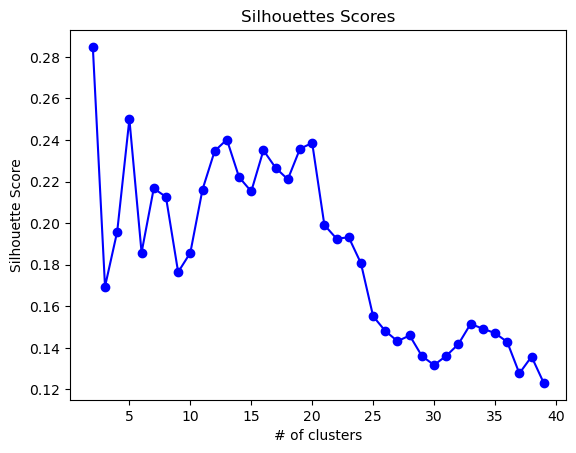

In [149]:
plt.plot(range(2, 40), silhouette_list, marker = 'o', color = 'blue')
plt.title('Silhouettes Scores')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette Score');

None of them are great but I would say somewhere around 13 clusters might be ideal